In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


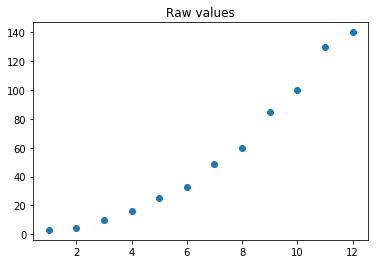

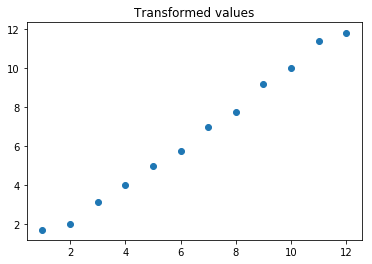

In [3]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

### The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed. Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

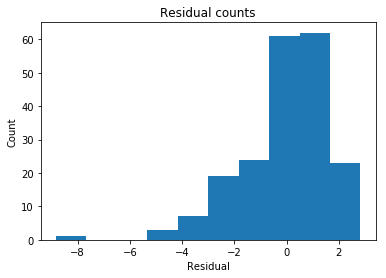

In [4]:
#Ultimate question here is if the results are normally distributed, i.e. there is no skewness to one side or the other
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption three: homoscedasticity
### The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic.
### For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance. This leads to overconfidence in the accuracy of your model's predictions.

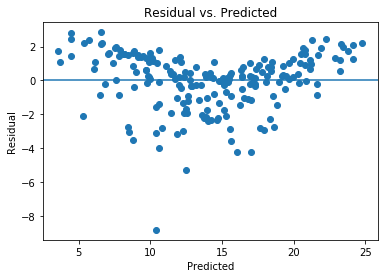

In [5]:
#Looks like there is low homoscedasticity in the graph below
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [6]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [7]:
data.shape

(200, 5)

In [8]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [9]:
data.tail(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.200,3.700,13.800,7.600
196,197,94.200,4.900,8.100,9.700
197,198,177.000,9.300,6.400,12.800
198,199,283.600,42.000,66.200,25.500
199,200,232.100,8.600,8.700,13.400


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
data = data.drop('Unnamed: 0', axis=1)

In [12]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [13]:
#applying PCA using Scikit-learn
from sklearn.preprocessing import StandardScaler
features = ['TV', 'Radio', 'Newspaper']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['Sales']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [14]:
print (x)

[[  9.69852266e-01   9.81522472e-01   1.77894547e+00]
 [ -1.19737623e+00   1.08280781e+00   6.69578760e-01]
 [ -1.51615499e+00   1.52846331e+00   1.78354865e+00]
 [  5.20496822e-02   1.21785493e+00   1.28640506e+00]
 [  3.94182198e-01  -8.41613655e-01   1.28180188e+00]
 [ -1.61540845e+00   1.73103399e+00   2.04592999e+00]
 [ -1.04557682e+00   6.43904671e-01  -3.24708413e-01]
 [ -3.13436589e-01  -2.47406325e-01  -8.72486994e-01]
 [ -1.61657614e+00  -1.42906863e+00  -1.36042422e+00]
 [  6.16042873e-01  -1.39530685e+00  -4.30581584e-01]
 [ -9.45155670e-01  -1.17923146e+00  -2.92486143e-01]
 [  7.90028350e-01   4.96973404e-02  -1.22232878e+00]
 [ -1.43908760e+00   7.99208859e-01   1.62704048e+00]
 [ -5.78501712e-01  -1.05768905e+00  -1.07502697e+00]
 [  6.66253447e-01   6.50657027e-01   7.11007392e-01]
 [  5.64664612e-01   1.65000572e+00   1.02862691e+00]
 [ -9.25304978e-01   9.00494200e-01   3.84117072e+00]
 [  1.56887609e+00   1.10306488e+00   1.16211917e+00]
 [ -9.08957349e-01  -1.86635

In [15]:
print (y)

[[ 22.1]
 [ 10.4]
 [  9.3]
 [ 18.5]
 [ 12.9]
 [  7.2]
 [ 11.8]
 [ 13.2]
 [  4.8]
 [ 10.6]
 [  8.6]
 [ 17.4]
 [  9.2]
 [  9.7]
 [ 19. ]
 [ 22.4]
 [ 12.5]
 [ 24.4]
 [ 11.3]
 [ 14.6]
 [ 18. ]
 [ 12.5]
 [  5.6]
 [ 15.5]
 [  9.7]
 [ 12. ]
 [ 15. ]
 [ 15.9]
 [ 18.9]
 [ 10.5]
 [ 21.4]
 [ 11.9]
 [  9.6]
 [ 17.4]
 [  9.5]
 [ 12.8]
 [ 25.4]
 [ 14.7]
 [ 10.1]
 [ 21.5]
 [ 16.6]
 [ 17.1]
 [ 20.7]
 [ 12.9]
 [  8.5]
 [ 14.9]
 [ 10.6]
 [ 23.2]
 [ 14.8]
 [  9.7]
 [ 11.4]
 [ 10.7]
 [ 22.6]
 [ 21.2]
 [ 20.2]
 [ 23.7]
 [  5.5]
 [ 13.2]
 [ 23.8]
 [ 18.4]
 [  8.1]
 [ 24.2]
 [ 15.7]
 [ 14. ]
 [ 18. ]
 [  9.3]
 [  9.5]
 [ 13.4]
 [ 18.9]
 [ 22.3]
 [ 18.3]
 [ 12.4]
 [  8.8]
 [ 11. ]
 [ 17. ]
 [  8.7]
 [  6.9]
 [ 14.2]
 [  5.3]
 [ 11. ]
 [ 11.8]
 [ 12.3]
 [ 11.3]
 [ 13.6]
 [ 21.7]
 [ 15.2]
 [ 12. ]
 [ 16. ]
 [ 12.9]
 [ 16.7]
 [ 11.2]
 [  7.3]
 [ 19.4]
 [ 22.2]
 [ 11.5]
 [ 16.9]
 [ 11.7]
 [ 15.5]
 [ 25.4]
 [ 17.2]
 [ 11.7]
 [ 23.8]
 [ 14.8]
 [ 14.7]
 [ 20.7]
 [ 19.2]
 [  7.2]
 [  8.7]
 [  5.3]
 [ 19.8]
 [ 13.4]
 

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
principalDf.head(5)

,principal component 1,principal component 2
0,2.111,-0.545
1,0.963,1.430
2,1.976,1.969
3,1.743,0.317
4,0.387,-0.327


In [18]:
finalDf = pd.concat([principalDf, data[['Sales']]], axis = 1)


In [19]:
finalDf.head(10)

,principal component 1,principal component 2,Sales
0,2.111,-0.545,22.100
1,0.963,1.430,10.400
2,1.976,1.969,9.300
3,1.743,0.317,18.500
4,0.387,-0.327,12.900
5,2.277,2.134,7.200
6,0.003,1.072,11.800
7,-0.840,0.144,13.200
8,-2.265,1.171,4.800
9,-1.135,-0.874,10.600


In [20]:
#Re-running the model using dataframe from having PCA applied to it to compare values with original values
# Instantiate and fit our model.
regr2 = linear_model.LinearRegression()
Y2 = finalDf['Sales'].values.reshape(-1, 1)
X2 = finalDf[['principal component 1','principal component 2']]
regr2.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', regr2.coef_)
print('\nIntercept: \n', regr2.intercept_)
print('\nR-squared:')
print(regr2.score(X2, Y2))


Coefficients: 
 [[ 2.72953867 -3.41901742]]

Intercept: 
 [ 14.0225]

R-squared:
0.801429855835


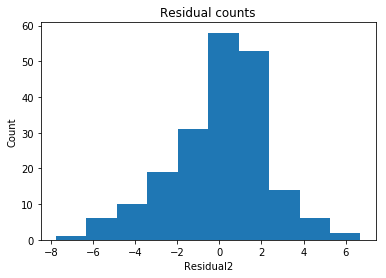

In [21]:
#Applying original data supplied in table that has been transformed by PCA using scikit-learn to compare with earlier
#graph up top; looks like there is better distribution of values, compared with original graph
# Extract predicted values.
predicted2 = regr2.predict(X2).ravel()
actual2 = finalDf['Sales']

# Calculate the error, also called the residual.
residual2 = actual2 - predicted2

# This looks a bit concerning.
plt.hist(residual2)
plt.title('Residual counts')
plt.xlabel('Residual2')
plt.ylabel('Count')
plt.show()

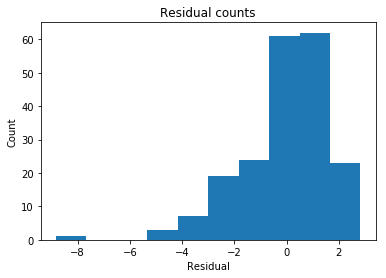

In [22]:
#original plot from up top at beginning(shown for comparison)
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

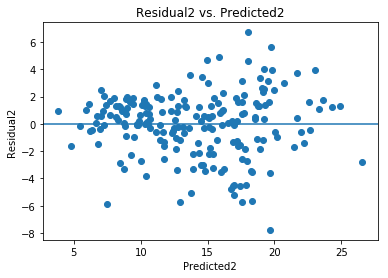

In [23]:
#better homoscedasticity
plt.scatter(predicted2, residual2)
plt.xlabel('Predicted2')
plt.ylabel('Residual2')
plt.axhline(y=0)
plt.title('Residual2 vs. Predicted2')
plt.show()

# Hm... looks a bit concerning.

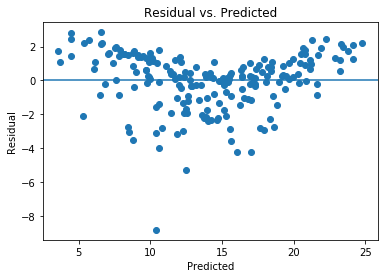

In [24]:
#original plot from up top at beginning showing poor homoscedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [25]:
#The explained variance tells you how much information (variance)
#can be attributed to each of the principal components; looks like there is a 79% explained variance from using the 
#2 principal components. 
pca.explained_variance_ratio_

array([ 0.45695084,  0.32775205])

In [26]:
#correlation matrix of the two prinicipal components
correlation_matrix2 = X2.corr()
display(correlation_matrix2)

,principal component 1,principal component 2
principal component 1,1.000,-0.000
principal component 2,-0.000,1.000


### Overall it looks like the data was transformed into a set of data having better homoscedasticity and the residual counts are more evenly distributed by having applied PCA thru scikit-learn.